# Inflow Performance Index Curve Calculator for Vogal's Meathod

This program will calculate the IPR curve for the Entered Values.

First user will have to give input values to the fuction that are Pr= Reservior Pressure Pb= Bubble Point Pressure Qnot= Oil Flow rate at a given Pwf Pwf= Bottom Hole Pressure

In [1]:
#Importing required Libraries
import numpy as np
from matplotlib import pyplot as plt  

In [2]:
def IPR():
    Pr= int(input("Enter Reservior Pressure(In Psi) :"))
    Pb= int(input("Enter Bubble Point Pressure(In Psi) :"))
    Qnot= int(input("Enter Oil Production Rate at given Pwf(In STB/day) :"))
    Pwf= int(input("Enter BottomHole Pressure(In Psi) :"))

    if Pr<=Pb:
        print("This is a Saturated Reservior")
        Qmax= Qnot/(1-0.2*(Pwf/Pr)-0.8*(Pwf/Pr)**2) #This will calclute Qmax for the well
        Pwf1= np.arange(0,Pr,400) #This will make a list of Pwf ranging between 0 to Reservior Pressure. 
        #print(Pwf1)
        #print(Qmax)
        Q1=[]
        for i in Pwf1:
            Q= Qmax*(1-0.2*(i/Pr)-0.8*(i/Pr)**2)
            Q1.append(Q)
            
        print("Oil Production Rate q(stb/day)=",Q1)
        print("Bottom-Hole Pressure p_wf(psia)=",Pwf1)
        plt.figure()
        plt.grid()
        plt.title('Inflow Performance Relationship for Well')
        plt.plot(Q1,Pwf1)
        plt.xlabel('Oil Production Rate q(stb/day)')
        plt.ylabel('Bottom-Hole Pressure p_wf(psia)')
        
    else :
        print("This is an Un-Saturated Reservior")
        if Pwf>=Pb :
            #Now we will find J i.e Productivity Index
            print("Pwf is greater than bubble point pressure.")
            J= Qnot/(Pr-Pwf)
            Qbubble= J*(Pr-Pb)
            Pwf1= np.arange(0,Pr,400) #Now we will create our Bore Hole Pressures
            Q1=[]
            for i in Pwf1: #We will calculate for both Pwf greater and smaller than Bubble Point Pressure.
                if i>= Pb :
                    Q= J*(Pr-i) #Using Constant-J Approach for Pwf > Pb
                    Q1.append(Q)
                else :
                    q_v= (J*Pb)/1.8 #Using Vogals meathod for Pwf < Pb
                    Q2= Qbubble + q_v * ( 1 - 0.2*(i/Pb) - 0.8*(i/Pb)**2)

                    Q1.append(Q2)
            print("Productivity Inderx=",J)
            print("Bubble Point pressure=",Qbubble)
            print("Oil Production Rate q(stb/day)=",Q1)
            print("Bottom-Hole Pressure p_wf(psia)",Pwf1)
            plt.figure()
            plt.grid()
            plt.title('Inflow Performance Relationship for Well')
            plt.plot(Q1,Pwf1)
            plt.xlabel('Oil Production Rate q(stb/day)')
            plt.ylabel('Bottom-Hole Pressure p_wf(psia)')
            
        else :
            print("Pwf is smaller than bubble point pressure.")
            J= Qnot/((Pr-Pb)+(Pb/1.8)*(1-0.2*(Pwf/Pb)-0.8*(Pwf/Pb)**2))
            Qbubble= J*(Pr-Pb)
            Pwf1= np.arange(0,Pr,400) #Now we will create our Bore Hole Pressures
            Q1=[]
            for i in Pwf1: #We will calculate for both Pwf greater and smaller than Bubble Point Pressure.
                if i>= Pb :
                    Q= J*(Pr-i) #Using Constant-J Approach for Pwf > Pb
                    Q1.append(Q)
                else :
                    q_v= (J*Pb)/1.8 #Using Vogals meathod for Pwf < Pb
                    Q2= Qbubble + q_v * ( 1 - 0.2*(i/Pb) - 0.8*(i/Pb)**2)

                    Q1.append(Q2)
            print("Productivity Index=",J)
            print("Bubble Point Pressure=",Qbubble)
            print("Oil Production Rate q(stb/day)=",Q1)
            print("Bottom-Hole Pressure p_wf(psia)=",Pwf1)
            plt.figure()
            plt.grid()
            plt.title('Inflow Performance Relationship for Well')
            plt.plot(Q1,Pwf1)
            plt.xlabel('Oil Production Rate q(stb/day)')
            plt.ylabel('Bottom-Hole Pressure p_wf(psia)')
                    
        

Enter Reservior Pressure(In Psi) :2500
Enter Bubble Point Pressure(In Psi) :3000
Enter Oil Production Rate at given Pwf(In STB/day) :350
Enter BottomHole Pressure(In Psi) :2000
This is a Saturated Reservior
Oil Production Rate q(stb/day)= [1067.0731707317077, 1011.0731707317076, 911.3658536585368, 767.9512195121954, 580.8292682926831, 349.99999999999994, 75.46341463414637]
Bottom-Hole Pressure p_wf(psia)= [   0  400  800 1200 1600 2000 2400]


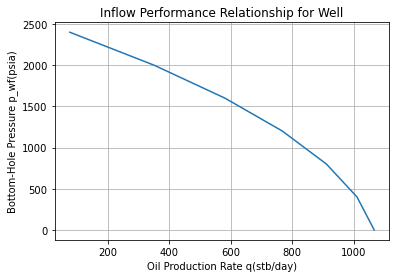

In [3]:
IPR()

Enter Reservior Pressure(In Psi) :3000
Enter Bubble Point Pressure(In Psi) :2130
Enter Oil Production Rate at given Pwf(In STB/day) :250
Enter BottomHole Pressure(In Psi) :2500
This is an Un-Saturated Reservior
Pwf is greater than bubble point pressure.
Productivity Inderx= 0.5
Bubble Point pressure= 435.0
Oil Production Rate q(stb/day)= [1026.6666666666665, 987.7516953573291, 915.4512258737611, 809.7652582159624, 670.6937923839332, 498.23682837767336, 300.0, 100.0]
Bottom-Hole Pressure p_wf(psia) [   0  400  800 1200 1600 2000 2400 2800]


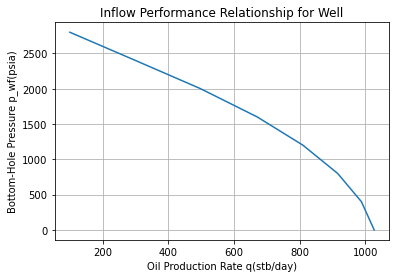

In [4]:
IPR()

Enter Reservior Pressure(In Psi) :3000
Enter Bubble Point Pressure(In Psi) :2130
Enter Oil Production Rate at given Pwf(In STB/day) :670
Enter BottomHole Pressure(In Psi) :1700
This is an Un-Saturated Reservior
Pwf is smaller than bubble point pressure.
Productivity Index= 0.5311479070690697
Bubble Point Pressure= 462.0986791500906
Oil Production Rate q(stb/day)= [1090.6237025151563, 1049.2844913859415, 972.4800052933247, 860.2102442373064, 712.4752082178866, 529.2748972350649, 318.6887442414418, 106.22958141381393]
Bottom-Hole Pressure p_wf(psia)= [   0  400  800 1200 1600 2000 2400 2800]


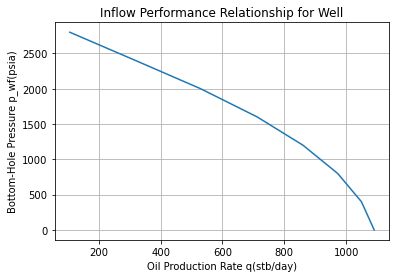

In [5]:
IPR()

Enter Reservior Pressure(In Psi) :3400
Enter Bubble Point Pressure(In Psi) :2100
Enter Oil Production Rate at given Pwf(In STB/day) :685
Enter BottomHole Pressure(In Psi) :1200
This is an Un-Saturated Reservior
Pwf is smaller than bubble point pressure.
Productivity Index= 0.33767605633802816
Bubble Point Pressure= 438.9788732394366
Oil Production Rate q(stb/day)= [832.9342723004695, 806.491914449661, 757.1804903495045, 685.0, 589.9504434011476, 472.0318205529473, 337.67605633802816, 202.6056338028169, 67.53521126760563]
Bottom-Hole Pressure p_wf(psia)= [   0  400  800 1200 1600 2000 2400 2800 3200]


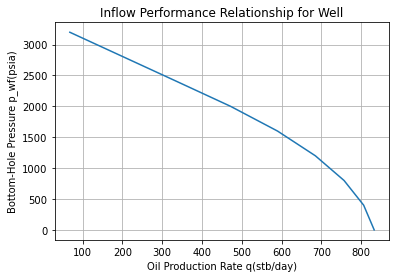

In [7]:
#User can enter any value.

IPR()

In [ ]:
IPR()